### spark-sklearn and scikit-spark don't work with the latest versions of sklearn

In [1]:
!pip uninstall scikit-learn -y

Uninstalling scikit-learn-0.21.3:
  Successfully uninstalled scikit-learn-0.21.3


In [2]:
!pip install -U scikit-learn==0.19.2

     |████████████████████████████████| 7.1MB 556kB/s eta 0:00:01
ERROR: yellowbrick 1.0.post1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: mlxtend 0.17.0 has requirement scikit-learn>=0.20.3, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: dask-ml 1.0.0 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: category-encoders 2.0.0 has requirement scikit-learn>=0.20.0, but you'll have scikit-learn 0.19.2 which is incompatible.
  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2


In [3]:
!pip install spark-sklearn

  Created wheel for spark-sklearn: filename=spark_sklearn-0.3.0-cp36-none-any.whl size=30591 sha256=7fe33bd1376ac4c666401952658aab37123f543ae7ef0158932976a8cfa69e26
  Stored in directory: /Users/jananiravi/Library/Caches/pip/wheels/64/28/e8/cb0250888675c630786f932dcc63ed96ac1aca299bcfb7235f
Successfully built spark-sklearn


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [1]:
from sklearn import datasets

#### The digits dataset
Normalized bitmaps of handwritten digits

In [2]:
digits = datasets.load_digits()

X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
X[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [4]:
y[1]

1

In [5]:
import matplotlib.pyplot as plt 

<Figure size 432x288 with 0 Axes>

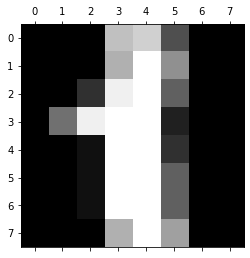

In [6]:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

#### Build a 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [0.1, 0.3, 1.0],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [10, 20, 40, 80]}

In [9]:
gs = GridSearchCV(RandomForestClassifier(), 
                  param_grid=param_grid, 
                  n_jobs=2)

In [13]:
%time gs.fit(X, y)

CPU times: user 4.38 s, sys: 252 ms, total: 4.64 s
Wall time: 1min 41s


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [0.1, 0.3, 1.0], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'n_estimators': [10, 20, 40, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
gs.n_jobs

2

In [15]:
gs.score(X, y)

0.9443516972732332

In [16]:
gs.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 0.1,
 'n_estimators': 80}

In [17]:
gs.best_score_

0.8903728436282693

In [10]:
!pip install -U pyspark

Requirement already up-to-date: pyspark in /anaconda3/lib/python3.6/site-packages (2.4.4)


In [10]:
from pyspark import SparkContext

sc = SparkContext()

In [11]:
from spark_sklearn import GridSearchCV as sparkGridSearchCV

In [12]:
spark_gs = sparkGridSearchCV(sc=sc, 
                             estimator=RandomForestClassifier(), 
                             param_grid=param_grid, 
                             n_jobs=2)

In [13]:
%time spark_gs.fit(X, y)

CPU times: user 507 ms, sys: 133 ms, total: 640 ms
Wall time: 2min 10s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [0.1, 0.3, 1.0], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'n_estimators': [10, 20, 40, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       sc=<SparkContext master=local[*] appName=pyspark-shell>,
       scoring=None, verbose=0)

In [14]:
spark_gs.n_jobs

2

#### View the parameters for the best estimator

In [15]:
spark_gs.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=0.1, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

#### View the Grid Search CV results
View them in a dataframe

In [16]:
import pandas as pd

gs_results_df = pd.DataFrame(spark_gs.cv_results_)

#### Sort by the best performer in tests
The top row should correspond to the best_estimator returned by the GridSearchCV (scroll to the right to view the params.

In [17]:
sorted_results = gs_results_df.sort_values(by='mean_test_score', 
                                           ascending=False)

sorted_results.reset_index(inplace=True, drop=True
                          )
sorted_results.head()

,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,...,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params
0,0.908638,0.889816,0.889262,0.895938,0.009017,1,0.948954,0.949917,0.955870,0.951580,...,0.020726,0.002046,False,entropy,None,3,3,0.1,80,"{'bootstrap': False, 'criterion': 'entropy', '..."
1,0.892027,0.893155,0.890940,0.892042,0.000903,2,0.943933,0.946578,0.949209,0.946573,...,0.018861,0.001464,False,entropy,None,3,10,0.1,80,"{'bootstrap': False, 'criterion': 'entropy', '..."
2,0.892027,0.899833,0.884228,0.892042,0.006363,2,0.945607,0.932387,0.957535,0.945176,...,0.018403,0.001321,False,entropy,None,10,3,0.1,80,"{'bootstrap': False, 'criterion': 'entropy', '..."
3,0.897010,0.874791,0.890940,0.887590,0.009383,4,0.943933,0.930718,0.950042,0.941564,...,0.010711,0.003969,False,gini,None,3,3,0.1,40,"{'bootstrap': False, 'criterion': 'gini', 'max..."
4,0.895349,0.879800,0.885906,0.887034,0.006405,5,0.957322,0.950751,0.946711,0.951595,...,0.018768,0.000805,False,entropy,None,3,1,0.1,80,"{'bootstrap': False, 'criterion': 'entropy', '..."


In [18]:
sorted_results['params'][0]

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 0.1,
 'n_estimators': 80}